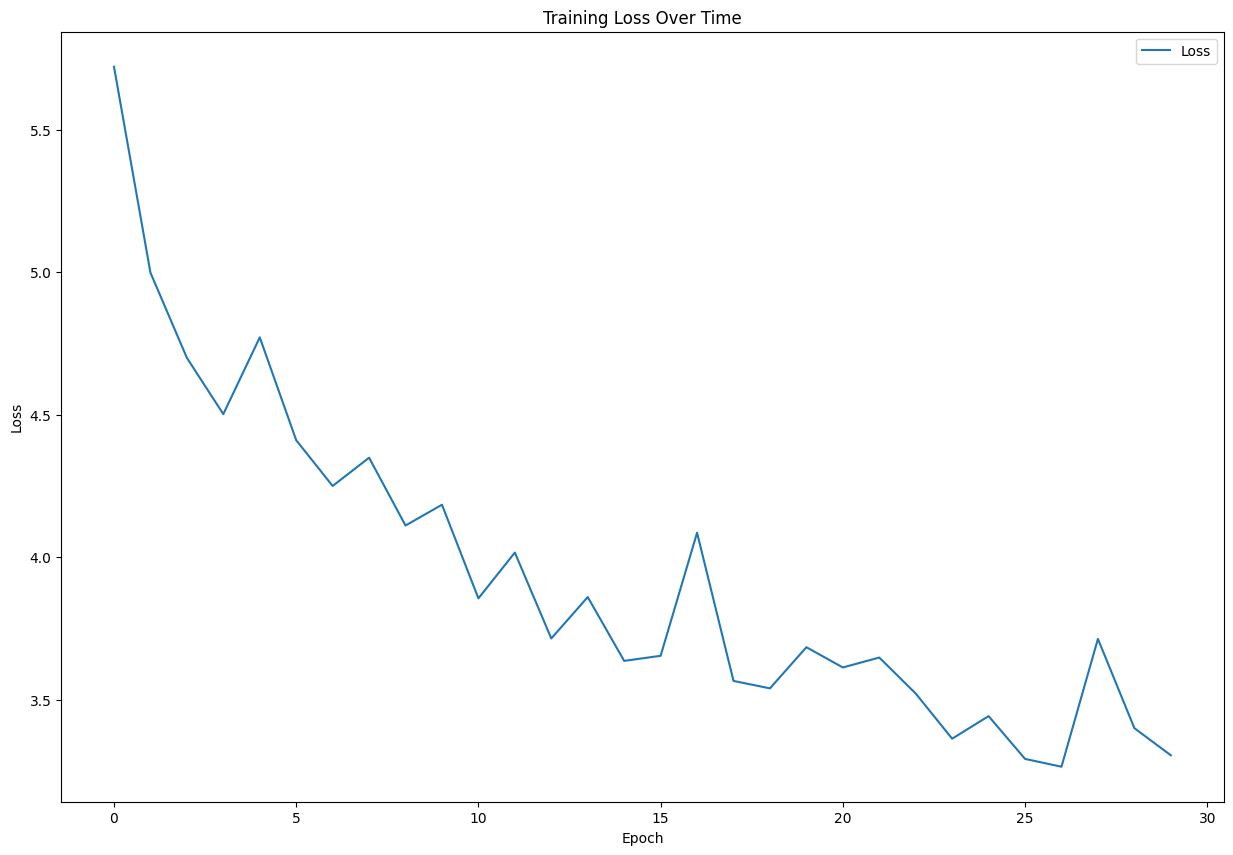

In [21]:
import matplotlib.pyplot as plt
import re

# Read the log file
with open('training_logs.txt', 'r') as f:
    training_logs = f.readlines()

epochs = []
losses = []
losses_ce = []
losses_bbox = []
losses_giou = []

# To track the current epoch and sum of losses
current_epoch = -1
sum_losses = 0
num_losses = 0

for log in training_logs:
    # Extract the epoch and avg loss using a regular expression
    epoch_match = re.search(r'Epoch: \[(\d+)\]', log)
    loss_match = re.search(r'loss: ([\d\.]+)', log)
    

    if epoch_match is not None and loss_match is not None:
        epoch = int(epoch_match.group(1))
        loss = float(loss_match.group(1))
    

        if epoch != current_epoch:
            # If it's a new epoch, save the average loss of the previous epoch
            if num_losses > 0:  # Avoid division by zero for the first epoch
                avg_loss = sum_losses / num_losses
                avg_loss_ce = sum_losses_ce / num_losses
                avg_loss_bbox = sum_losses_bbox / num_losses
                avg_loss_giou = sum_losses_giou / num_losses
                epochs.append(current_epoch)
                losses.append(avg_loss)
              

            # Reset the counters for the new epoch
            current_epoch = epoch
            sum_losses = 0
            sum_losses_ce = 0
            sum_losses_bbox = 0
            sum_losses_giou = 0
            num_losses = 0

        sum_losses += loss
        num_losses += 1

# Don't forget to add the last epoch
if num_losses > 0:
    avg_loss = sum_losses / num_losses
    avg_loss_ce = sum_losses_ce / num_losses
    avg_loss_bbox = sum_losses_bbox / num_losses
    avg_loss_giou = sum_losses_giou / num_losses
    epochs.append(current_epoch)
    losses.append(avg_loss)
    losses_ce.append(avg_loss_ce)
    losses_bbox.append(avg_loss_bbox)
    losses_giou.append(avg_loss_giou)

# Now plot the losses
plt.figure(figsize=(15, 10))
plt.plot(epochs, losses, label='Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()  # Display legend
plt.show()  # Show the plot


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

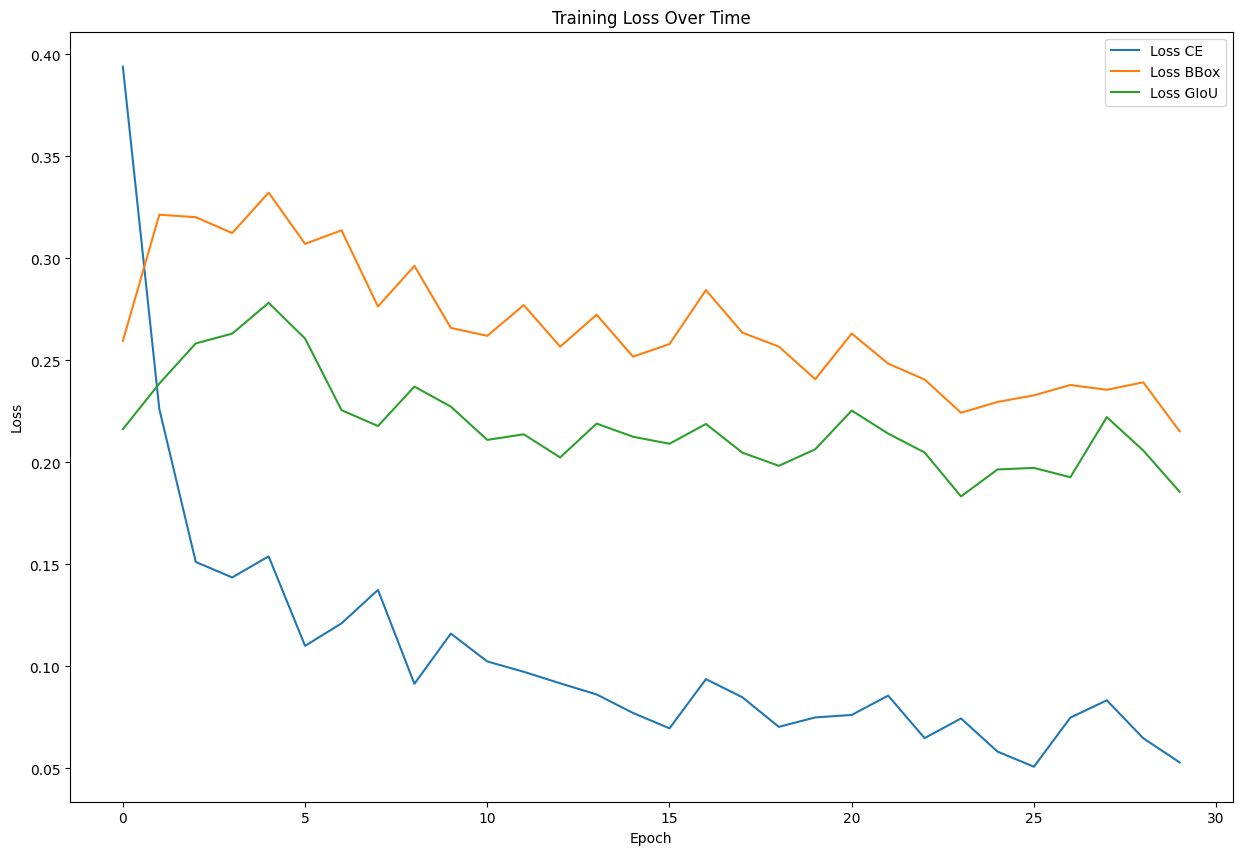

In [13]:
import matplotlib.pyplot as plt
import re

# Read the log file
with open('training_logs.txt', 'r') as f:
    training_logs = f.readlines()

epochs = []
losses = []
losses_ce = []
losses_bbox = []
losses_giou = []

# To track the current epoch and sum of losses
current_epoch = -1
sum_losses = 0
sum_losses_ce = 0
sum_losses_bbox = 0
sum_losses_giou = 0
num_losses = 0

for log in training_logs:
    # Extract the epoch and losses using a regular expression
    epoch_match = re.search(r'Epoch: \[(\d+)\]', log)
    loss_match = re.search(r'loss: ([\d\.]+)', log)
    loss_ce_match = re.search(r'loss_ce: ([\d\.]+)', log)
    loss_bbox_match = re.search(r'loss_bbox: ([\d\.]+)', log)
    loss_giou_match = re.search(r'loss_giou: ([\d\.]+)', log)

    if epoch_match is not None and loss_match is not None:
        epoch = int(epoch_match.group(1))
        loss = float(loss_match.group(1))
        loss_ce = float(loss_ce_match.group(1)) if loss_ce_match else 0
        loss_bbox = float(loss_bbox_match.group(1)) if loss_bbox_match else 0
        loss_giou = float(loss_giou_match.group(1)) if loss_giou_match else 0

        if epoch != current_epoch:
            # If it's a new epoch, save the average loss of the previous epoch
            if num_losses > 0:  # Avoid division by zero for the first epoch
                avg_loss = sum_losses / num_losses
                avg_loss_ce = sum_losses_ce / num_losses
                avg_loss_bbox = sum_losses_bbox / num_losses
                avg_loss_giou = sum_losses_giou / num_losses
                epochs.append(current_epoch)
                losses.append(avg_loss)
                losses_ce.append(avg_loss_ce)
                losses_bbox.append(avg_loss_bbox)
                losses_giou.append(avg_loss_giou)

            # Reset the counters for the new epoch
            current_epoch = epoch
            sum_losses = 0
            sum_losses_ce = 0
            sum_losses_bbox = 0
            sum_losses_giou = 0
            num_losses = 0

        sum_losses += loss
        sum_losses_ce += loss_ce
        sum_losses_bbox += loss_bbox
        sum_losses_giou += loss_giou
        num_losses += 1

# Don't forget to add the last epoch
if num_losses > 0:
    avg_loss = sum_losses / num_losses
    avg_loss_ce = sum_losses_ce / num_losses
    avg_loss_bbox = sum_losses_bbox / num_losses
    avg_loss_giou = sum_losses_giou / num_losses
    epochs.append(current_epoch)
    losses.append(avg_loss)
    losses_ce.append(avg_loss_ce)
    losses_bbox.append(avg_loss_bbox)
    losses_giou.append(avg_loss_giou)

# Now plot the losses
plt.figure(figsize=(15, 10))
plt.plot(epochs, losses_ce, label='Loss CE')
plt.plot(epochs, losses_bbox, label='Loss BBox')
plt.plot(epochs, losses_giou, label='Loss GIoU')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()  # Display legend
plt.show()  # Show the plot